# 1 - Importar Conjunto de dados

In [1]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Upload the data file and plot the same
df = pd.read_csv('ocorrencia_GMC.csv', sep=";")

# 2 - Explorar Informações básicas:

In [3]:
# Obter informações sobre as colunas
print(df.info())

# Verificar o tipo de dados de cada coluna
print(df.dtypes)
print('-----------------------------------------------')
# Visualizar as primeiras linhas do DataFrame
print(df.head())

# Resumo descritivo das colunas e estatísticas básicas
print(df.describe())

# Dimensões do DataFrame (linhas e colunas)
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                1560 non-null   object
 1   cd_reg              1560 non-null   int64 
 2   total_ocorrencias   1560 non-null   int64 
 3   tot_flag            1560 non-null   int64 
 4   tot_flag_equip_urb  1560 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 61.1+ KB
None
Date                  object
cd_reg                 int64
total_ocorrencias      int64
tot_flag               int64
tot_flag_equip_urb     int64
dtype: object
-----------------------------------------------
      Date  cd_reg  total_ocorrencias  tot_flag  tot_flag_equip_urb
0  2009-01       1                180        42                 126
1  2009-01       2                 98         7                  68
2  2009-01       3                 90         4                  59
3  2009-01       4     

# 3 - EDA:

#### Medidas de tendência central e de dispersão

In [4]:
# Medidas de tendência central
print("Média:", df['total_ocorrencias'].mean())
print("Mediana:", df['total_ocorrencias'].median())

# Medidas de dispersão
print("Desvio Padrão:", df['total_ocorrencias'].std())
print("Variância:", df['total_ocorrencias'].var())
print("Amplitude:", df['total_ocorrencias'].max() - df['total_ocorrencias'].min())


Média: 97.86858974358974
Mediana: 85.0
Desvio Padrão: 58.61657223572058
Variância: 3435.902540665449
Amplitude: 382


#### Extraindo os Valores:

In [5]:
# Extraindo os valores da coluna 'total_ocorrencias' do DataFrame 'df'
total_ocorrencias = df['total_ocorrencias'].to_numpy()

#### Calculando Quartis:

In [6]:
# Calculando os quartis (Q1, Q2 e Q3) para o gráfico de boxplot
Q1 = np.percentile(total_ocorrencias, 25)
Q2 = np.percentile(total_ocorrencias, 50)
Q3 = np.percentile(total_ocorrencias, 75)

#### Gráfico de Distribuição de Frequência (Histograma):

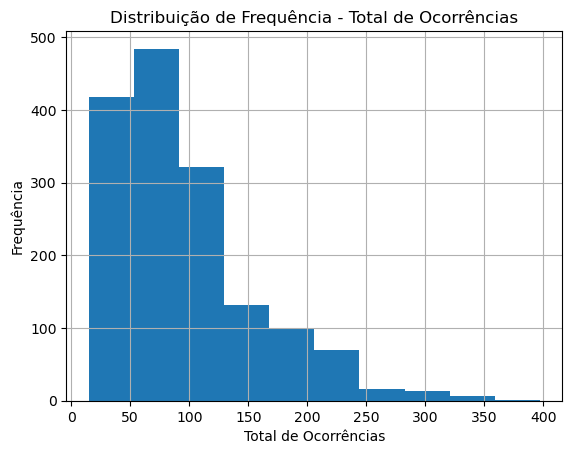

In [7]:
# Criando o histograma
plt.hist(total_ocorrencias)
plt.xlabel("Total de Ocorrências")
plt.ylabel("Frequência")
plt.title("Distribuição de Frequência - Total de Ocorrências")
plt.grid(True)
plt.show()

#### Diagrama de Caixa (Boxplot):

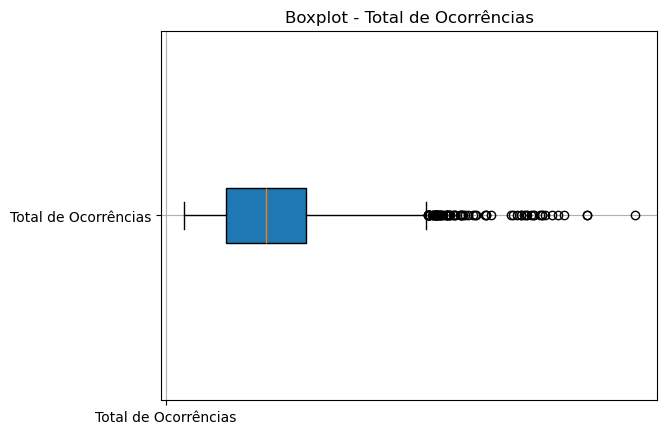

In [8]:
# Criando o diagrama de caixa
plt.boxplot([total_ocorrencias], vert=False, labels=["Total de Ocorrências"], patch_artist=True)
plt.xticks([0], ["Total de Ocorrências"])
plt.title("Boxplot - Total de Ocorrências")
plt.grid(True)
plt.show()

## Identificação de Outliers:

In [9]:
# Métodos para identificar outliers:
# 1. Z-Score:
#   - Calcular o Z-Score para cada valor: (valor - média) / desvio_padrão
#   - Considerar outliers valores com Z-Score acima de 3 ou abaixo de -3
# 2. IQR (Intervalo Interquartil):
#   - Calcular os quartis Q1, Q2 e Q3
#   - Considerar outliers valores abaixo de Q1 - 1,5 * IQR ou acima de Q3 + 1,5 * IQR

# Exemplo utilizando Z-Score:
z_scores = (df['total_ocorrencias'] - df['total_ocorrencias'].mean()) / df['total_ocorrencias'].std()
outliers_zscore = df[abs(z_scores) > 3]['total_ocorrencias'].index

# Verificar se há outliers
if len(outliers_zscore) > 0:
    print("Outliers encontrados (Z-Score):", outliers_zscore)
else:
    print("Não foram encontrados outliers (Z-Score)")

Outliers encontrados (Z-Score): Index([1360, 1370, 1380, 1383, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460,
       1463, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550],
      dtype='int64')


# 7 - Criação da Série Temporal para total_ocorrencias:

### Seasonal Decompose:

In [10]:
# Set the index to be the 'Date' column
df.set_index('Date', inplace=True)

In [11]:
series = pd.Series(df['total_ocorrencias'], index=df.index)

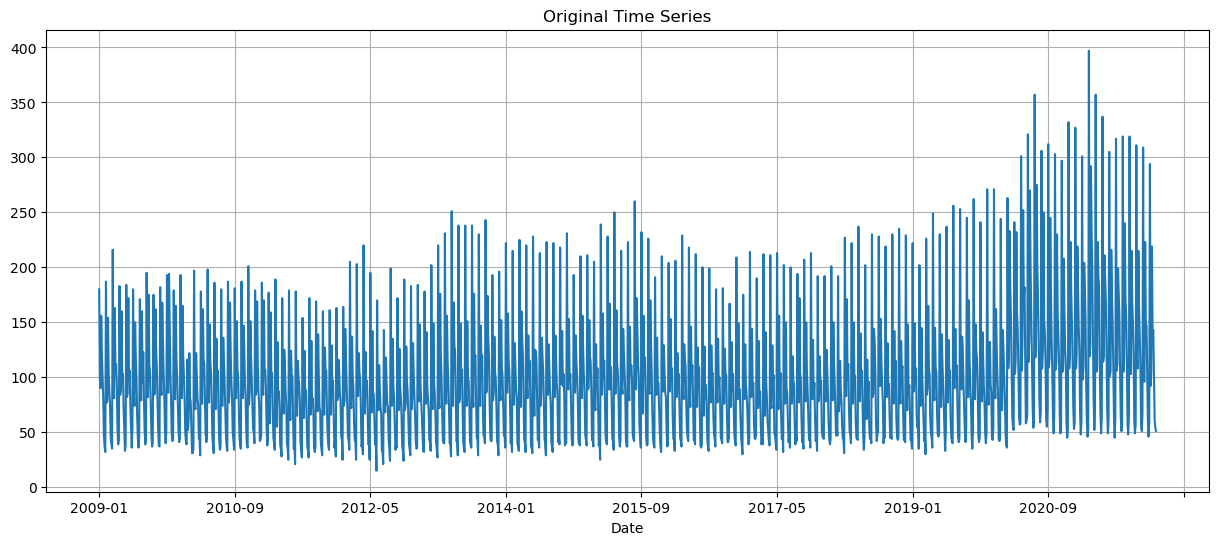

In [12]:
# Original time series plot
df['total_ocorrencias'].plot(figsize=(15, 6), grid=True)
plt.title('Original Time Series')
plt.show()


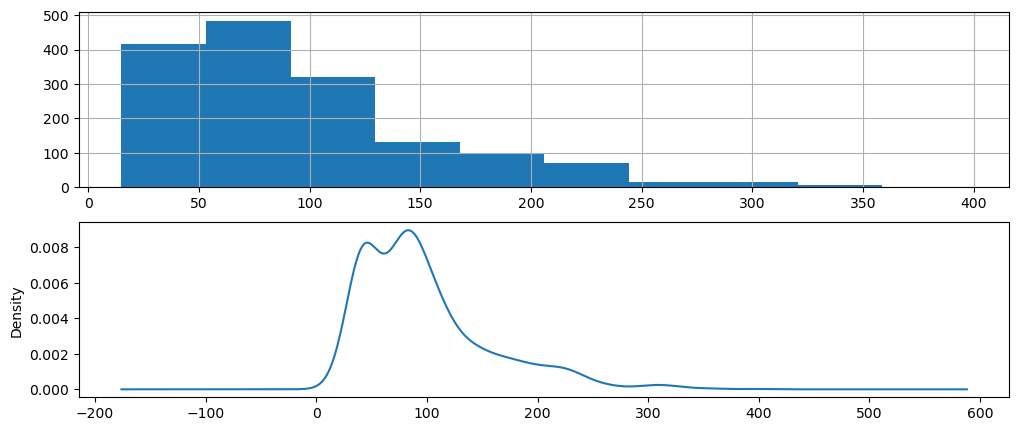

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,5))
df['total_ocorrencias'].hist(ax=ax1)
df['total_ocorrencias'].plot(kind='kde', ax=ax2)
plt.show()

In [54]:
import statsmodels.tsa.seasonal as sm
import matplotlib.dates as mdates

In [55]:
# Perform seasonal decomposition
decomposition = sm.seasonal_decompose(df['total_ocorrencias'], model='additive', period=48)

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<Figure size 1500x800 with 0 Axes>

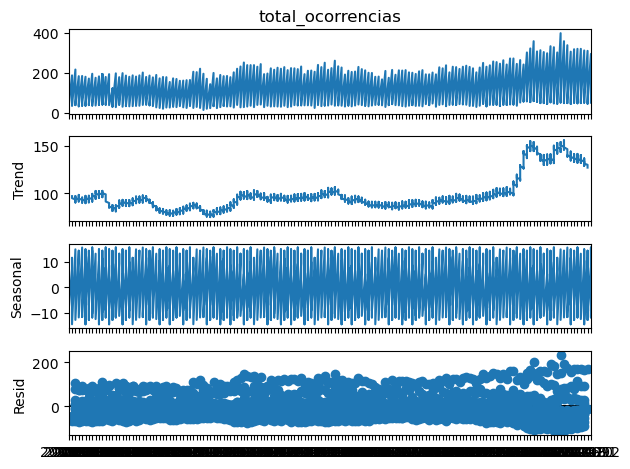

In [53]:
resultado_decomposicao = seasonal_decompose(series, model='additive', period=36)
plt.figure(figsize=(15, 8))
resultado_decomposicao.plot()
plt.show()

#### Média Móvel e Desvio Padrão

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


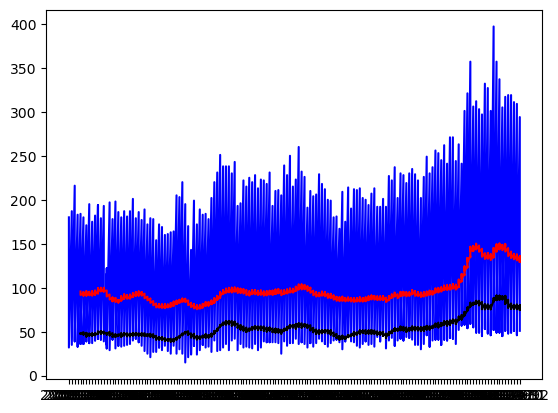

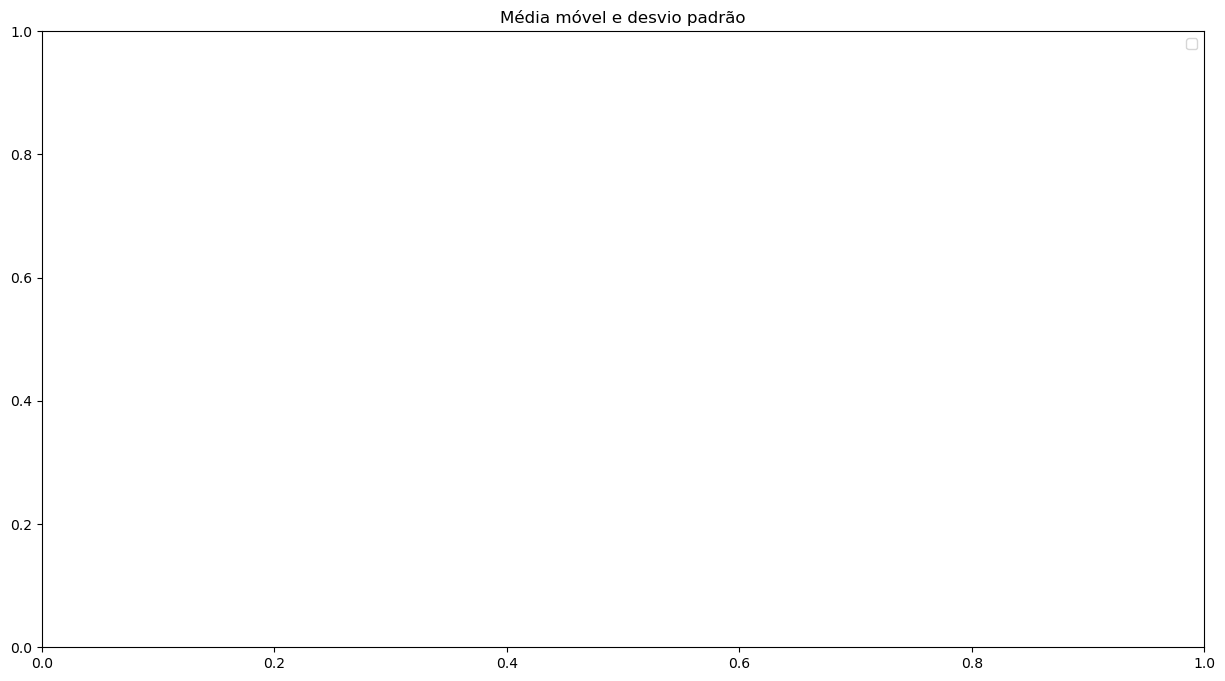

In [59]:
#Determing rolling statistics
rolmean = pd.Series(df['total_ocorrencias']).rolling(window=48).mean()
rolstd = pd.Series(df['total_ocorrencias']).rolling(window=48).std()

#Plot rolling statistics:
orig = plt.plot(df['total_ocorrencias'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.figure(figsize=(15, 8))
plt.legend(loc='best')
plt.title('Média móvel e desvio padrão')
plt.show(block=False)

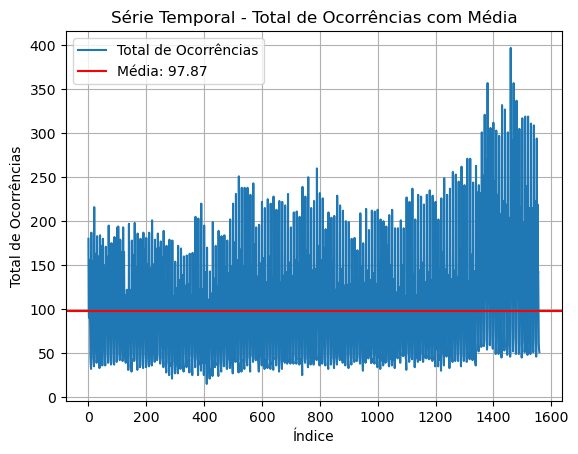

In [415]:
# Criando o gráfico de linha com média
plt.plot(total_ocorrencias, label="Total de Ocorrências")
plt.axhline(y=df['total_ocorrencias'].mean(), color="red", label=f"Média: {df['total_ocorrencias'].mean():.2f}")
plt.legend()
plt.xlabel("Índice")
plt.ylabel("Total de Ocorrências")
plt.title("Série Temporal - Total de Ocorrências com Média")
plt.grid(True)
plt.show()

## Decomposição da Série Temporal:

## 8.1 - Testes Estatísticos:

### Verificação da Estacionariedade (ACF e PACF):

In [416]:
from statsmodels.tsa.stattools import acf, pacf

In [418]:
import statsmodels.api as sm

# Loop through potential lags
best_aic = float('inf')
best_lag = 0
for lag in range(1, 31):  # Test lags from 1 to 30
   model = sm.tsa.stattools.adfuller(series, maxlag=lag, regression='c')
   aic = model[1]
   if aic < best_aic:
       best_aic = aic
       best_lag = lag

print(f"Best lag according to AIC: {best_lag}")


Best lag according to AIC: 1


### Teste Dickey-Fuller:

In [419]:
from statsmodels.tsa.stattools import adfuller

adf_resultado = adfuller(series)

print ('Resultados do Teste Dickey-Fuller:')

dfoutput = pd.Series(adf_resultado[0:4], index=['Estatística do Teste','Valor p','#Lags usados','Número de Observações Usadas'])
for key, value in adf_resultado[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
print(dfoutput)

Resultados do Teste Dickey-Fuller:
Estatística do Teste              -1.446093
Valor p                            0.559990
#Lags usados                      22.000000
Número de Observações Usadas    1537.000000
Valor crítico (1%)                -3.434612
Valor crítico (5%)                -2.863422
Valor crítico (10%)               -2.567772
dtype: float64


### Teste Kwiatkowski-Phillips-Shields-Susmel (KPSS):

In [420]:
from statsmodels.tsa.stattools import kpss

In [421]:
resultado_kpss = kpss(series)
estatistica_kpss = resultado_kpss[0]
valor_p_kpss = resultado_kpss[1]
print("Estatística do Teste KPSS:", estatistica_kpss)
print("Valor p:", valor_p_kpss)


Estatística do Teste KPSS: 4.901838919623005
Valor p: 0.01


C:\Users\Aline\AppData\Local\Temp\ipykernel_2148\411507169.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(series)


### Teste DF-GLS

In [422]:
import statsmodels.api as sm 

In [423]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'serie_normalizada' is your time series data (replace with your actual data)
adf_gls_result = adfuller(series, maxlag=1, regression='c')

# Extract test statistics
adf_gls_statistic = adf_gls_result[0]
p_value = adf_gls_result[1]

print('adf_gls_statistic: ', adf_gls_statistic)
print('p_value: ',p_value)
# Interpret test results (adjust based on your significance level)
if p_value > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

adf_gls_statistic:  -28.953317604811282
p_value:  0.0
The time series is stationary.


# 9 - transformação logarítmica:

In [424]:
import numpy as np

In [425]:
# Identificar a coluna da série temporal 
series = df["total_ocorrencias"]

In [426]:
# Aplicar a transformação logarítmica
serie_log = np.log1p(series)

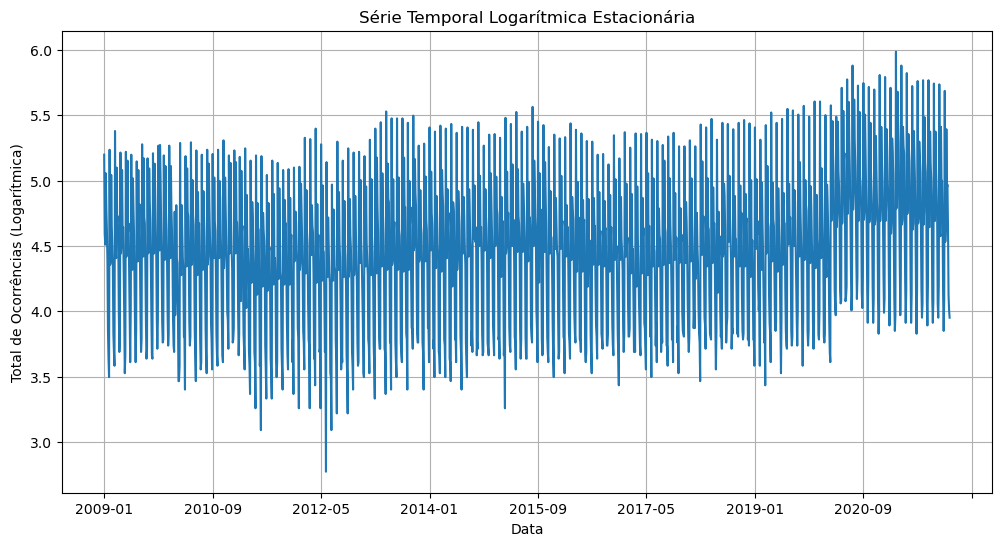

In [427]:
plt.figure(figsize=(12, 6))
serie_log.plot()
plt.xlabel('Data')
plt.ylabel('Total de Ocorrências (Logarítmica)')
plt.title('Série Temporal Logarítmica Estacionária')
plt.grid(True)
plt.show()

In [428]:
# Loop through potential lags
best_aic = float('inf')
best_lag = 0
for lag in range(1, 31):  # Test lags from 1 to 30
   model = sm.tsa.stattools.adfuller(serie_log, maxlag=lag, regression='c')
   aic = model[1]
   if aic < best_aic:
       best_aic = aic
       best_lag = lag

print(f"Best lag according to AIC: {best_lag}")


Best lag according to AIC: 1


### Verificação da Estacionariedade (ACF e PACF):

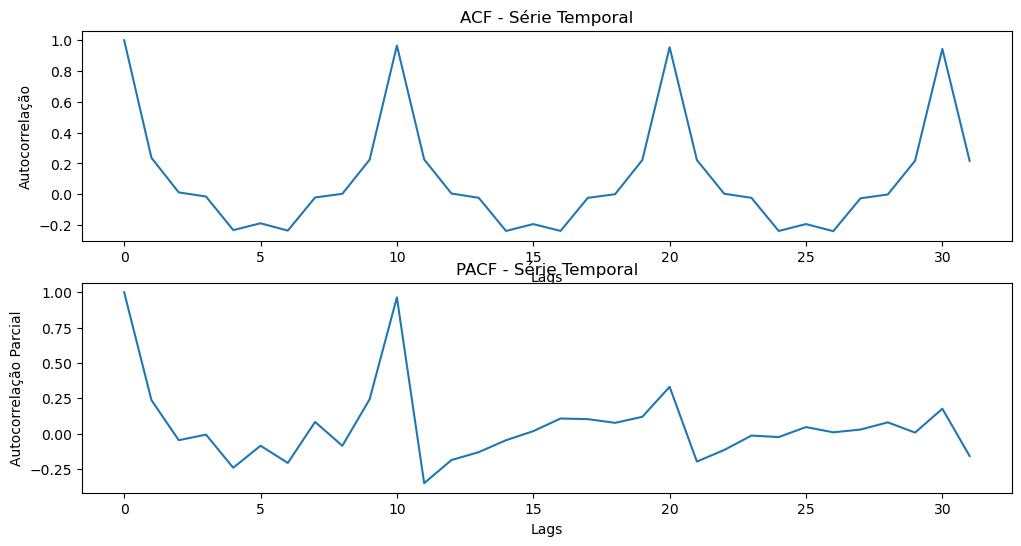

In [429]:

acf_resultado = acf(serie_log)
pacf_resultado = pacf(serie_log)

plt.figure(figsize=(12, 6))

# Gráfico ACF
plt.subplot(2, 1, 1)
plt.plot(acf_resultado)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('ACF - Série Temporal')

# Gráfico PACF
plt.subplot(2, 1, 2)
plt.plot(pacf_resultado)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.title('PACF - Série Temporal')

plt.show()

### Teste Dickey-Fuller:

In [430]:
adf_resultado = adfuller(serie_log)

print ('Resultados do Teste Dickey-Fuller:')

dfoutput = pd.Series(adf_resultado[0:4], index=['Estatística do Teste','Valor p','#Lags usados','Número de Observações Usadas'])
for key, value in adf_resultado[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
print(dfoutput)

Resultados do Teste Dickey-Fuller:
Estatística do Teste              -1.562082
Valor p                            0.502608
#Lags usados                      21.000000
Número de Observações Usadas    1538.000000
Valor crítico (1%)                -3.434609
Valor crítico (5%)                -2.863421
Valor crítico (10%)               -2.567771
dtype: float64


###  Teste DF-GLS

In [445]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'serie_normalizada' is your time series data (replace with your actual data)
adf_gls_result = adfuller(serie_log, maxlag=1, regression='c')

# Extract test statistics
adf_gls_statistic = adf_gls_result[0]
p_value = adf_gls_result[1]

print('adf_gls_statistic: ', adf_gls_statistic)
print('p_value: ',p_value)
# Interpret test results (adjust based on your significance level)
if p_value > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

adf_gls_statistic:  -25.510332211239344
p_value:  0.0
The time series is stationary.


In [448]:
#Criar novo dataframe
dados_log = pd.DataFrame()

In [449]:
#Adicionar colunas da série transformada que foi utilizado o método de transformação de normalização
dados_log["ocorrencias_log"] = serie_log

In [451]:
# Visualizar as primeiras linhas do DataFrame
print(dados_log.head())

         ocorrencias_log
Date                    
2009-01         5.198497
2009-01         4.595120
2009-01         4.510860
2009-01         5.056246
2009-01         4.787492


In [360]:
#Salvar em um novo dataset
dados_transformados.to_csv("ocorrencias_log.csv", index=False)

# 10 - transformação Normalizada:

In [361]:
from sklearn.preprocessing import StandardScaler

In [455]:
# Aplicar a transformação de Normalização
serie_temporal = df["total_ocorrencias"]
scaler = StandardScaler()
serie_normalizada = scaler.fit_transform(serie_temporal.to_numpy().reshape(-1, 1))[:, 0]

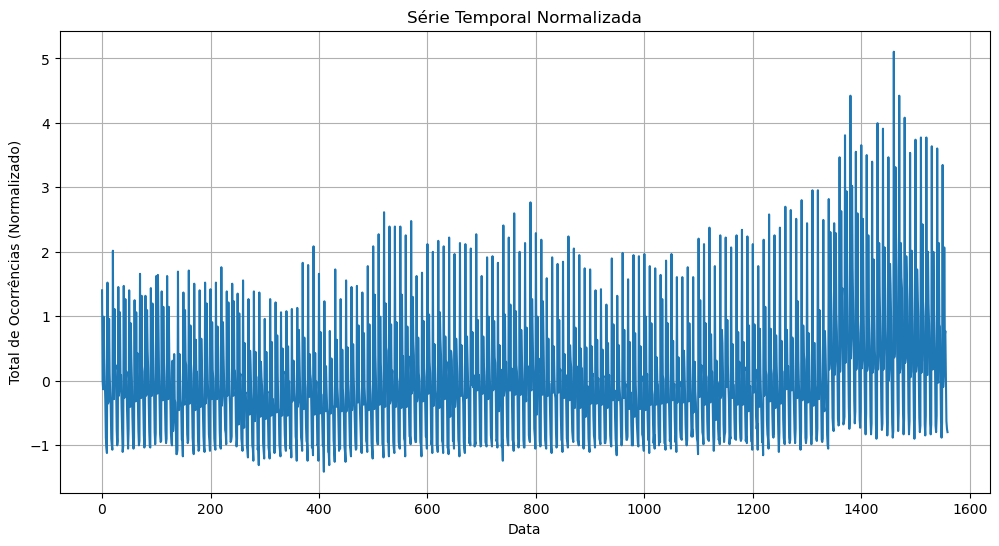

In [456]:
serie_tempo_norm_pd = pd.Series(serie_normalizada)

# Plot the normalized series
plt.figure(figsize=(12, 6))
serie_tempo_norm_pd.plot()
plt.xlabel('Data')
plt.ylabel('Total de Ocorrências (Normalizado)')
plt.title('Série Temporal Normalizada')
plt.grid(True)
plt.show()

### Verificação da Estacionariedade (ACF e PACF):

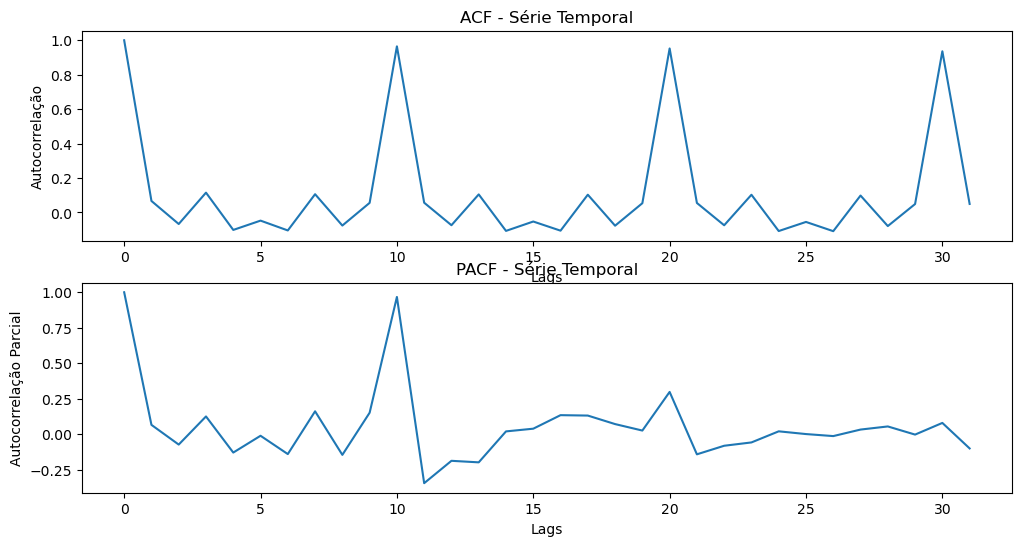

In [457]:

acf_resultado = acf(serie_normalizada)
pacf_resultado = pacf(serie_normalizada)

plt.figure(figsize=(12, 6))

# Gráfico ACF
plt.subplot(2, 1, 1)
plt.plot(acf_resultado)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('ACF - Série Temporal')

# Gráfico PACF
plt.subplot(2, 1, 2)
plt.plot(pacf_resultado)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.title('PACF - Série Temporal')

plt.show()

### Teste Dickey-Fuller:

In [458]:
adf_resultado = adfuller(serie_normalizada)

print ('Resultados do Teste Dickey-Fuller:')

dfoutput = pd.Series(adf_resultado[0:4], index=['Estatística do Teste','Valor p','#Lags usados','Número de Observações Usadas'])
for key, value in adf_resultado[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
print(dfoutput)

Resultados do Teste Dickey-Fuller:
Estatística do Teste              -1.446093
Valor p                            0.559990
#Lags usados                      22.000000
Número de Observações Usadas    1537.000000
Valor crítico (1%)                -3.434612
Valor crítico (5%)                -2.863422
Valor crítico (10%)               -2.567772
dtype: float64


### Teste DF-GLS

In [459]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'serie_normalizada' is your time series data (replace with your actual data)
adf_gls_result = adfuller(serie_normalizada, maxlag=1, regression='c')

# Extract test statistics
adf_gls_statistic = adf_gls_result[0]
p_value = adf_gls_result[1]

print('adf_gls_statistic: ', adf_gls_statistic)
print('p_value: ',p_value)
# Interpret test results (adjust based on your significance level)
if p_value > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

adf_gls_statistic:  -28.9533176048113
p_value:  0.0
The time series is stationary.


In [460]:
#Criar novo dataframe
dados_transformados = pd.DataFrame()

In [461]:
# Adicionar novas colunas no novo dataset
#dados_transformados["cd_reg"] = df["cd_reg"]
#dados_transformados["total_ocorrencias"] = df["total_ocorrencias"]

# Opcional:
#if "tot_flag" in df.columns:#
    #dados_transformados["Ttot_flag"] = df["tot_flag"]
#if "tot_flag_equip_urb" in df.columns:
  #  dados_transformados["tot_flag_equip_urb"] = df["tot_flag_equip_urb"]

In [462]:
Adicionar colunas da série transformada que foi utilizado o método de transformação de normalização
dados_transformados["ocorrencias_normalizadas"] = serie_normalizada

SyntaxError: invalid syntax (1636088829.py, line 1)

In [ ]:
# Visualizar as primeiras linhas do DataFrame
print(dados_log.head())

In [370]:
#Salvar em um novo dataset
#dados_transformados.to_csv("ocorencias_norm.csv", index=False)

# 11 - transformação Diferença:

In [371]:
# Aplicar a transformação de diferença
serie_diferenca = serie_temporal.diff(12)

In [372]:
print(serie_diferenca)

Date
2009-01     NaN
2009-01     NaN
2009-01     NaN
2009-01     NaN
2009-01     NaN
           ... 
2021-12   -80.0
2021-12   -46.0
2021-12   -86.0
2021-12   -52.0
2021-12   -10.0
Name: total_ocorrencias, Length: 1560, dtype: float64


In [373]:
numero_nulos = serie_diferenca.isnull().sum()
print(f"Número de valores nulos na série transformada: {numero_nulos}")

Número de valores nulos na série transformada: 12


In [374]:
#pip install --upgrade scikit-learn

In [375]:
from sklearn.impute import KNNImputer

In [376]:
serie_diferenciada = serie_diferenca

In [377]:
# Crie o imputador KNN
imputador = KNNImputer(n_neighbors=5)

In [378]:
# Treine o imputador com os dados da série
imputador.fit(serie_diferenciada.values.reshape(-1, 1))

KNNImputer()

In [379]:
# Impute o valor nulo
serie_imputada = imputador.transform(serie_diferenciada.values.reshape(-1, 1))
serie_imputada = pd.Series(serie_imputada.ravel(), index=serie_diferenciada.index, name=serie_diferenciada.name)

In [380]:
# Visualize a série imputada
print("Série original:")
print(serie_diferenciada)
print("\nSérie imputada:")
print(serie_imputada)

Série original:
Date
2009-01     NaN
2009-01     NaN
2009-01     NaN
2009-01     NaN
2009-01     NaN
           ... 
2021-12   -80.0
2021-12   -46.0
2021-12   -86.0
2021-12   -52.0
2021-12   -10.0
Name: total_ocorrencias, Length: 1560, dtype: float64

Série imputada:
Date
2009-01     0.104651
2009-01     0.104651
2009-01     0.104651
2009-01     0.104651
2009-01     0.104651
             ...    
2021-12   -80.000000
2021-12   -46.000000
2021-12   -86.000000
2021-12   -52.000000
2021-12   -10.000000
Name: total_ocorrencias, Length: 1560, dtype: float64


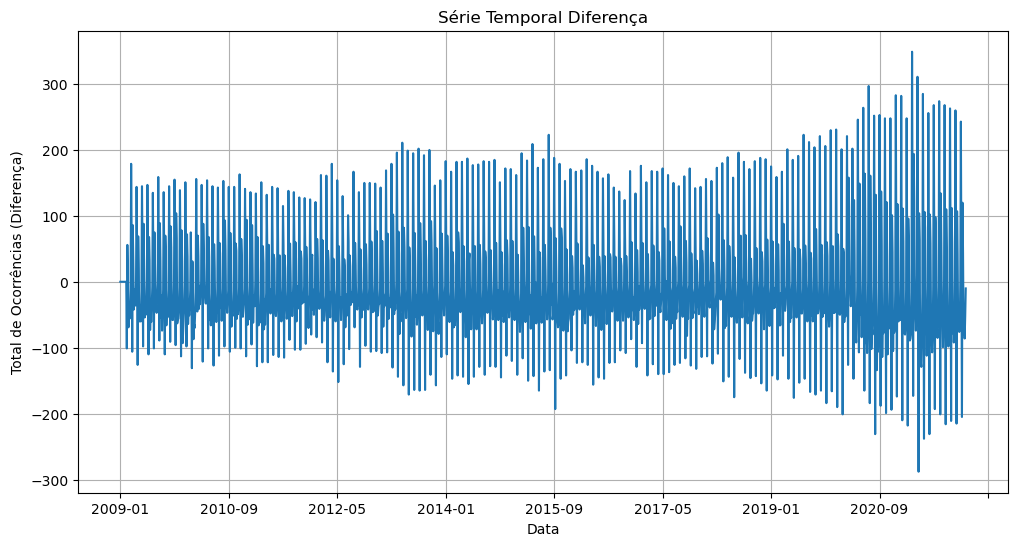

In [381]:
plt.figure(figsize=(12, 6))
serie_imputada.plot()
plt.xlabel('Data')
plt.ylabel('Total de Ocorrências (Diferença)')
plt.title('Série Temporal Diferença')
plt.grid(True)
plt.show()

### Verificação da Estacionariedade (ACF e PACF):

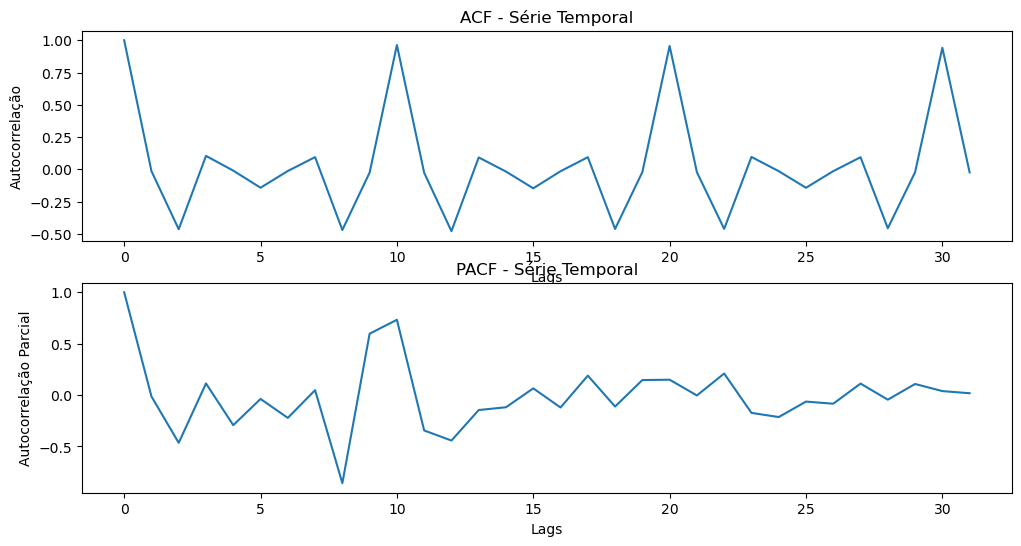

In [382]:
acf_resultado = acf(serie_imputada)
pacf_resultado = pacf(serie_imputada)

plt.figure(figsize=(12, 6))

# Gráfico ACF
plt.subplot(2, 1, 1)
plt.plot(acf_resultado)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('ACF - Série Temporal')

# Gráfico PACF
plt.subplot(2, 1, 2)
plt.plot(pacf_resultado)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.title('PACF - Série Temporal')

plt.show()

### Teste Dickey-Fuller:

In [383]:
adf_resultado = adfuller(serie_imputada)

print ('Resultados do Teste Dickey-Fuller:')

dfoutput = pd.Series(adf_resultado[0:4], index=['Estatística do Teste','Valor p','#Lags usados','Número de Observações Usadas'])
for key, value in adf_resultado[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
print(dfoutput)

Resultados do Teste Dickey-Fuller:
Estatística do Teste           -9.409409e+00
Valor p                         5.890476e-16
#Lags usados                    2.300000e+01
Número de Observações Usadas    1.536000e+03
Valor crítico (1%)             -3.434614e+00
Valor crítico (5%)             -2.863424e+00
Valor crítico (10%)            -2.567773e+00
dtype: float64


In [384]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'serie_normalizada' is your time series data (replace with your actual data)
adf_gls_result = adfuller(serie_imputada, maxlag=1, regression='c')

# Extract test statistics
adf_gls_statistic = adf_gls_result[0]
p_value = adf_gls_result[1]

print('adf_gls_statistic: ', adf_gls_statistic)
print('p_value: ',p_value)
# Interpret test results (adjust based on your significance level)
if p_value > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

adf_gls_statistic:  -46.42195065316972
p_value:  0.0
The time series is stationary.


In [385]:
#Criar novo dataframe
#dados_transformados = pd.DataFrame()

In [386]:
# Adicionar novas colunas no novo dataset
#dados_transformados["cd_reg"] = df["cd_reg"]
#dados_transformados["total_ocorrencias"] = df["total_ocorrencias"]

# Opcional:
#if "tot_flag" in df.columns:
#    dados_transformados["Ttot_flag"] = df["tot_flag"]
#if "tot_flag_equip_urb" in df.columns:
#    dados_transformados["tot_flag_equip_urb"] = df["tot_flag_equip_urb"]

In [387]:
#Adicionar colunas da série transformada que foi utilizado o método de transformação de normalização
#dados_transformados["ocorrencias_diff"] = serie_imputada

In [388]:
#Salvar em um novo dataset
#dados_transformados.to_csv("ocorencias_diff.csv", index=False)

# Tranformação Box-Cox

In [477]:
from scipy.special import log1p 

In [478]:
df = pd.read_csv('ocorrencia_GMC.csv', sep=";")
target_variable = "total_ocorrencias"

In [479]:
from scipy.optimize import minimize 

In [480]:
# Verifique se a variável-alvo é numérica
if not pd.api.types.is_numeric_dtype(df[target_variable]):
    raise ValueError("A variável-alvo deve ser numérica.")

In [481]:
# Aplicação da transformação Box-Cox com otimização de lambda
def neg_log_likelihood(lambda_value):
    """
    Calcula a função de verossimilhança negativa para a transformação Box-Cox.

    Args:
        lambda_value (float): Valor de lambda a ser avaliado.

    Returns:
        float: Valor da função de verossimilhança negativa.
    """

    y_transformed = df[target_variable] ** lambda_value
    mean_transformed = np.mean(y_transformed)
    var_transformed = np.var(y_transformed)
    n = len(y_transformed)

    # Fórmula da função de verossimilhança negativa de Box-Cox
    neg_log_likelihood = 0.5 * n * np.log(var_transformed) + (
        n - 1
    ) / lambda_value * (mean_transformed - 1) ** 2

    return neg_log_likelihood

# Otimização do lambda
lambda_optimal = minimize(neg_log_likelihood, x0=1, method="Nelder-Mead").x[0]

# Transforme os dados usando o lambda ideal
df[target_variable + "_boxcox"] = df[target_variable] ** lambda_optimal

# Utilize a variável transformada para a sua análise
# ...

print("Transformação Box-Cox realizada com sucesso!")

Transformação Box-Cox realizada com sucesso!


C:\Users\Aline\AppData\Local\Temp\ipykernel_2148\2177245959.py:19: RuntimeWarning: divide by zero encountered in log
  neg_log_likelihood = 0.5 * n * np.log(var_transformed) + (
C:\Users\Aline\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


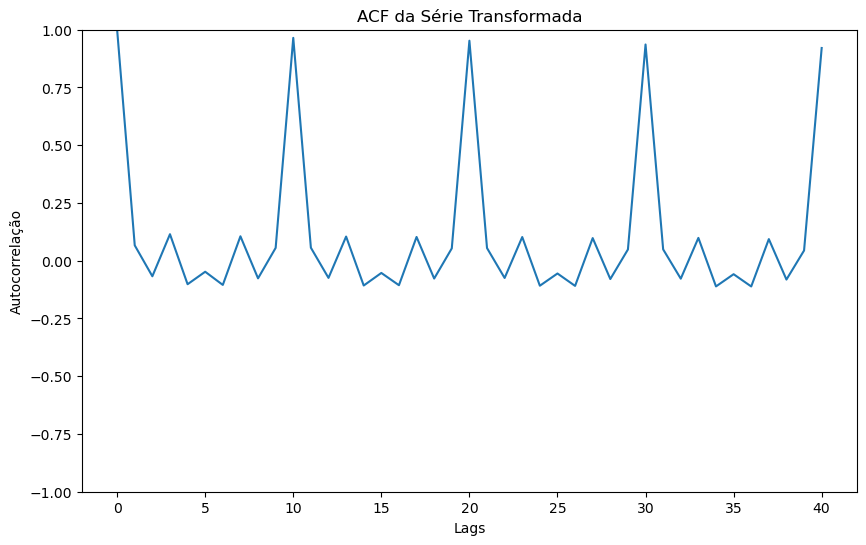

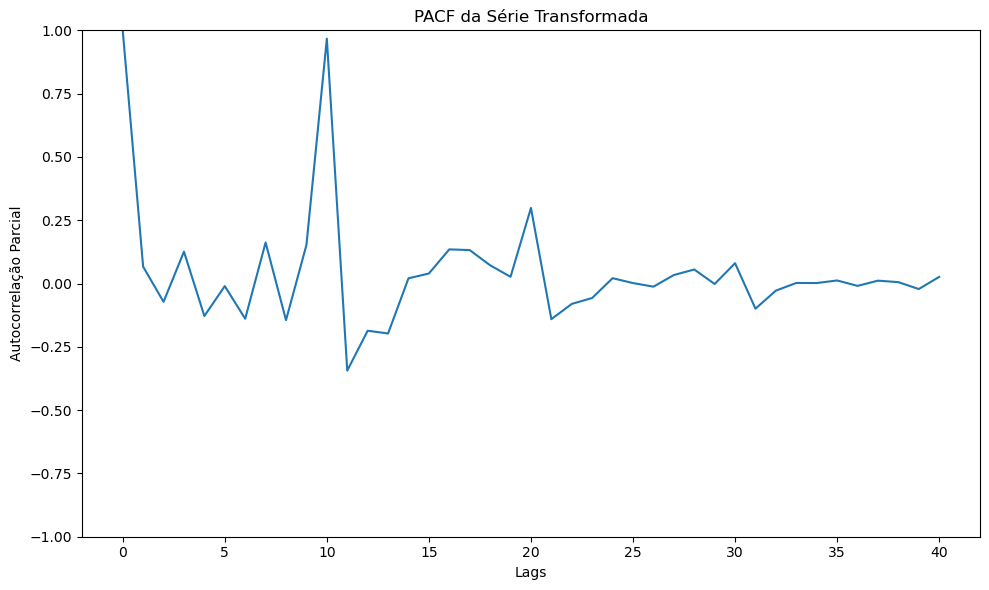

In [482]:
# Carregue seus dados e a variável transformada (se aplicável)
df = pd.read_csv('ocorrencia_GMC.csv', sep=";")
target_variable = "total_ocorrencias"
target_variable_transformed = target_variable + "_boxcox"  # Se a variável foi transformada

# Obtenha a série a ser analisada (original ou transformada)
series_Ori = df[target_variable]  # Série original
if target_variable_transformed in df:
    series_box = df[target_variable_transformed]  # Série transformada

# Cálculo e plotagem do ACF
fig, ax1 = plt.subplots(figsize=(10, 6))
acf_values = acf(series, nlags=40)  # Calcula os valores ACF para 40 lags
ax1.plot(acf_values)
ax1.set_xlabel("Lags")
ax1.set_ylabel("Autocorrelação")
ax1.set_title("ACF da Série Transformada")

# Cálculo e plotagem do PACF
fig, ax2 = plt.subplots(figsize=(10, 6))
pacf_values = pacf(series, nlags=40)  # Calcula os valores PACF para 40 lags
ax2.plot(pacf_values)
ax2.set_xlabel("Lags")
ax2.set_ylabel("Autocorrelação Parcial")
ax2.set_title("PACF da Série Transformada")

# Ajustar limites dos eixos (opcional)
ax1.set_ylim([-1, 1])
ax2.set_ylim([-1, 1])

plt.tight_layout()
plt.show()

In [483]:
#Criar novo dataframe
dados_box = pd.DataFrame()

In [484]:
# Adicionar novas colunas no novo dataset
dados_box["cd_reg"] = df["cd_reg"]
dados_box["total_ocorrencias"] = df["total_ocorrencias"]

# Opcional:
if "tot_flag" in df.columns:
    dados_transformados["Ttot_flag"] = df["tot_flag"]
if "tot_flag_equip_urb" in df.columns:
    dados_transformados["tot_flag_equip_urb"] = df["tot_flag_equip_urb"]

In [485]:
#Adicionar colunas da série transformada que foi utilizado o método de transformação de diferença
dados_transformados["ocorrencias_boxcox"] = series

In [486]:
print(dados_box.head())

   cd_reg  total_ocorrencias
0       1                180
1       2                 98
2       3                 90
3       4                156
4       5                119


In [266]:
#Salvar em um novo dataset
#dados_transformados.to_csv("dados_transformacao_boxcox.csv", index=False)

In [395]:
adf_resultado = adfuller(series)

print ('Resultados do Teste Dickey-Fuller:')

dfoutput = pd.Series(adf_resultado[0:4], index=['Estatística do Teste','Valor p','#Lags usados','Número de Observações Usadas'])
for key, value in adf_resultado[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
print(dfoutput)

Resultados do Teste Dickey-Fuller:
Estatística do Teste              -1.446093
Valor p                            0.559990
#Lags usados                      22.000000
Número de Observações Usadas    1537.000000
Valor crítico (1%)                -3.434612
Valor crítico (5%)                -2.863422
Valor crítico (10%)               -2.567772
dtype: float64


In [396]:
resultado_kpss = kpss(serie_imputada)
estatistica_kpss = resultado_kpss[0]
valor_p_kpss = resultado_kpss[1]
print("Estatística do Teste KPSS:", estatistica_kpss)
print("Valor p:", valor_p_kpss)

Estatística do Teste KPSS: 0.08911588580160294
Valor p: 0.1


C:\Users\Aline\AppData\Local\Temp\ipykernel_2148\567871239.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie_imputada)


In [397]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'serie_normalizada' is your time series data (replace with your actual data)
adf_gls_result = adfuller(series, maxlag=1, regression='c')

# Extract test statistics
adf_gls_statistic = adf_gls_result[0]
p_value = adf_gls_result[1]

print('adf_gls_statistic: ', adf_gls_statistic)
print('p_value: ',p_value)
# Interpret test results (adjust based on your significance level)
if p_value > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

adf_gls_statistic:  -28.953317604811282
p_value:  0.0
The time series is stationary.
